# PCA - Embeddings

## Select Target Dataset:
- Name
- Ironic / Non ironic

In [1]:
TARGET_DATASET = 'TwReyes2013'
#DATASET_TYPE = 'non_ironic'
DATASET_TYPE = 'ironic'

path = !pwd
assets_path = '{}/references/thesis/assets/pca/'.format('/'.join(path[0].split('/')[:-1]), 'thesis/s', TARGET_DATASET)
print('Target dataset:\t{}'.format(TARGET_DATASET))
print('Assets path:\t{}'.format(assets_path))
print('Dataset type:\t{}'.format(assets_path))

Target dataset:	TwReyes2013
Assets path:	/home/gianluca/Documents/dev/irony-detection/references/thesis/assets/pca/
Dataset type:	/home/gianluca/Documents/dev/irony-detection/references/thesis/assets/pca/


## Leggo il dataframe
Vengono scartate tutte le parole con un'occorrenza < 10

In [2]:
import pandas as pd
import numpy as np


df = pd.read_pickle("../data/processed/{}.pca/out_matrix${}.pkl".format(TARGET_DATASET, DATASET_TYPE))
#df = df.astype(np.float32)
# Remove invalid tokens
df.drop(['[CLS]', '[SEP]', 'rt'], inplace=True)
# Remove unused columns
df.drop(['#+', '#-', 'coeff'], axis=1, inplace=True)
# Remove all words which occurrence is less than 10
df = df[df['#'] >= 10]
df.drop(['#'], axis=1, inplace=True)
df

,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,embedding_10,...,embedding_3063,embedding_3064,embedding_3065,embedding_3066,embedding_3067,embedding_3068,embedding_3069,embedding_3070,embedding_3071,embedding_3072
wow,0.878383,1.559501,0.385506,0.079952,1.227133,-1.390389,-0.238496,-1.120216,-0.560156,-1.820844,...,-0.202724,0.494779,0.915868,-1.917199,-0.458863,0.791190,0.851247,0.975778,0.620648,-1.344629
ill,-0.639307,0.056079,0.572826,0.119638,-2.198502,0.783765,1.080216,0.642216,0.318637,-0.840573,...,1.488845,-0.483712,-0.065050,1.015563,-0.044949,1.574545,2.075070,-0.356886,0.416820,1.440779
say,-1.146658,1.271501,0.579094,-0.598736,-0.902160,1.062967,0.029657,2.137897,0.661339,-0.444994,...,1.137791,-0.510411,0.652318,1.045943,1.234847,1.189277,0.719379,-0.669018,-0.471569,-0.539578
more,-1.150428,-1.135215,-0.415028,-0.224559,-2.118906,-1.619599,-0.984814,0.992183,-0.268146,-2.846627,...,1.938425,-1.907942,0.012079,-1.588056,-1.559621,0.052953,-0.638786,1.448515,-0.225664,0.708282
than,-1.388207,-1.122970,-0.683385,0.958895,-1.095849,-1.844324,1.031415,-0.228544,-0.885179,-0.110963,...,0.482653,0.105541,-0.749285,0.174439,-0.469133,0.138910,0.077418,1.411544,0.914142,0.415670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
precious,0.055109,-0.561365,1.685172,0.175348,0.072773,-0.178933,-0.456720,-0.100293,0.738366,-0.605640,...,-0.463687,-0.827029,-1.342909,-0.813364,-1.630195,1.356821,-0.278711,-1.089850,-1.003787,-0.711176
holding,-0.830674,-0.718195,1.555343,-0.044749,-1.114250,-0.895525,-0.618885,2.219130,-0.862433,1.031503,...,-0.933004,0.335075,-0.106178,0.347829,0.220165,0.066200,1.140809,0.987632,-0.737779,0.561166
terrorists,-0.532619,0.056250,-0.207725,-0.588409,-0.140451,-0.500889,0.311940,-0.158195,-0.078427,0.900139,...,-0.489561,0.895242,0.817154,-0.243024,-0.589929,1.346565,1.666033,-1.373259,-0.153823,-0.877762
cheap,0.219099,-1.519511,1.387268,2.032907,-0.914966,0.447908,-1.949374,-0.440139,0.596126,0.204694,...,0.730382,-1.177222,-0.423876,-0.520372,-0.099034,1.303626,-0.028973,0.431720,0.535445,-0.001761


## Standardizzazione del dataset

In [3]:
from sklearn.preprocessing import StandardScaler

matrix = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns, index=df.index)
matrix

,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,embedding_10,...,embedding_3063,embedding_3064,embedding_3065,embedding_3066,embedding_3067,embedding_3068,embedding_3069,embedding_3070,embedding_3071,embedding_3072
wow,1.107574,1.753572,0.263381,0.006159,1.466497,-1.523127,-0.236407,-1.312780,-0.682185,-2.065867,...,-0.329429,0.678342,1.027462,-2.024514,-0.409995,0.698970,0.826356,1.069177,0.577012,-1.419206
ill,-0.487004,0.072939,0.465621,0.046937,-2.113417,0.858254,1.231814,0.477628,0.283170,-0.959516,...,1.515785,-0.410209,-0.059517,1.211582,0.029524,1.565584,2.141096,-0.463267,0.349203,1.410684
say,-1.020057,1.431625,0.472388,-0.691220,-0.758692,1.164068,0.062147,1.997050,0.659629,-0.513058,...,1.132845,-0.439911,0.735416,1.245104,1.388486,1.139368,0.684693,-0.822192,-0.643708,-0.601298
more,-1.024019,-1.258776,-0.600913,-0.306739,-2.030236,-1.774184,-1.067340,0.833149,-0.361411,-3.223583,...,2.006200,-1.994636,0.025952,-1.661327,-1.578843,-0.117730,-0.774368,1.612784,-0.368871,0.666490
than,-1.273844,-1.245087,-0.890643,0.909306,-0.961104,-2.020328,1.177481,-0.406955,-1.039222,-0.136064,...,0.418200,0.245322,-0.817732,0.283461,-0.420899,-0.022637,-0.004958,1.570270,0.905037,0.369205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
precious,0.242592,-0.617284,1.666560,0.104181,0.260149,-0.196202,-0.479372,-0.276668,0.744242,-0.694366,...,-0.614095,-0.792142,-1.475540,-0.806510,-1.653784,1.324719,-0.387543,-1.306111,-1.238543,-0.775636
holding,-0.688066,-0.792601,1.526392,-0.121977,-0.980335,-0.981096,-0.659923,2.079572,-1.014236,1.153343,...,-1.126040,0.500674,-0.105091,0.474784,0.311038,-0.103075,1.137430,1.082809,-0.941239,0.517025
terrorists,-0.374910,0.073130,-0.377099,-0.680608,0.037321,-0.548845,0.376434,-0.335489,-0.153005,1.005084,...,-0.642320,1.123849,0.918074,-0.177180,-0.549168,1.313373,1.701672,-1.632006,-0.288578,-0.944883
cheap,0.414890,-1.688370,1.344929,2.012894,-0.772075,0.490385,-2.141257,-0.621908,0.587991,0.220192,...,0.688430,-1.181725,-0.457139,-0.483214,-0.027907,1.265871,-0.119253,0.443559,0.481785,-0.054892


## Calcolo la matrice trasposta

In [4]:
# Transpose the matrix
matrix_t = df.transpose()
matrix_t

,wow,ill,say,more,than,irony,de,om,there,are,...,justice,thee,sponsors,linux,customers,precious,holding,terrorists,cheap,scared
embedding_1,0.878383,-0.639307,-1.146658,-1.150428,-1.388207,0.846748,-0.326330,1.021188,-1.957172,-1.077772,...,-0.156048,-0.550238,1.059586,-1.153093,-0.054820,0.055109,-0.830674,-0.532619,0.219099,0.221238
embedding_2,1.559501,0.056079,1.271501,-1.135215,-1.122970,1.323371,-1.564963,0.283325,-0.427898,-0.439974,...,-0.635083,0.450057,-0.309225,-0.064262,-0.696472,-0.561365,-0.718195,0.056250,-1.519511,-0.757316
embedding_3,0.385506,0.572826,0.579094,-0.415028,-0.683385,-0.242161,0.980841,-0.983887,-0.154168,-0.348328,...,1.382677,0.502468,-0.045943,0.658718,0.114288,1.685172,1.555343,-0.207725,1.387268,-0.438844
embedding_4,0.079952,0.119638,-0.598736,-0.224559,0.958895,0.370446,1.438356,-0.418317,2.667140,-0.404288,...,-0.987259,-0.277604,-0.496873,-0.850098,-0.221512,0.175348,-0.044749,-0.588409,2.032907,3.201791
embedding_5,1.227133,-2.198502,-0.902160,-2.118906,-1.095849,-0.564144,0.125983,0.453443,-0.337802,0.071440,...,0.294827,-1.821008,-3.126326,1.284280,-0.046175,0.072773,-1.114250,-0.140451,-0.914966,0.149557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
embedding_3068,0.791190,1.574545,1.189277,0.052953,0.138910,-0.954626,1.013937,0.772578,-0.474756,0.768085,...,-0.798570,-0.834236,-0.251898,0.111679,1.603308,1.356821,0.066200,1.346565,1.303626,0.440644
embedding_3069,0.851247,2.075070,0.719379,-0.638786,0.077418,0.387815,0.359772,-0.325591,1.256551,1.855020,...,1.399437,2.006783,0.519900,0.744623,0.566415,-0.278711,1.140809,1.666033,-0.028973,-0.189196
embedding_3070,0.975778,-0.356886,-0.669018,1.448515,1.411544,0.183465,-0.054993,-0.409955,-0.264712,-0.246828,...,0.632873,0.750266,-1.001190,-0.999381,-0.324429,-1.089850,0.987632,-1.373259,0.431720,0.481817
embedding_3071,0.620648,0.416820,-0.471569,-0.225664,0.914142,0.651647,1.479574,0.022896,1.110675,0.614806,...,-0.269699,0.404321,0.432283,-0.916970,-0.657341,-1.003787,-0.737779,-0.153823,0.535445,0.644649


## PCA
https://towardsdatascience.com/principal-component-analysis-for-dimensionality-reduction-115a3d157bad

In [5]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(matrix_t)
len(pca.components_)

2125

In [6]:
pca.explained_variance_

array([8.05286421e+01, 6.67297378e+01, 3.60933762e+01, ...,
       6.96729546e-04, 6.74200974e-04, 6.58506951e-04])

### Autovettori associati agli autovalori

Viene calcolato il contributo di ogni componente principale considerando i vari autovalori

In [7]:
import math

explained_variance = pca.explained_variance_ / sum(pca.explained_variance_)
# The overall explained variance must be 1
assert math.isclose(sum(explained_variance), 1)
# The eigenvalues are alredy sorted
assert np.all(explained_variance == sorted(explained_variance, reverse=True))

### Plot della varianza spiegata usando k componenti

In [8]:
import matplotlib.pyplot as plt 

FONTSIZE = 12
X_DIM = 18
Y_DIM = 14
plt.rc('font', size=FONTSIZE)          # controls default text sizes

def top_k_dimensions(explained_variance, k):
    return explained_variance[:k], np.cumsum(explained_variance)[:k]

def plot_dimensions(top_k, cum_sum):
    def plot_bar(i):
        plt.figure(figsize=(Y_DIM, X_DIM))
        plt.subplot(2, 1, i)
        plt.bar(range(1, len(top_k) + 1), top_k, alpha=0.5,
                align='center', label='explained variance')
        plt.ylabel('Explained variance ratio')
        plt.xlabel('Principal component')
        plt.xticks()
        plt.xticks(range(1, len(top_k) + 1), range(1, len(top_k) + 1), rotation='vertical')
        plt.legend(loc='best')

    # Second subplot
    plot_bar(2)
    plt.savefig(assets_path + '{}/var.png'.format(DATASET_TYPE), bbox_inches='tight')
    plt.show()
    # First subplot
    plot_bar(1)
    plt.step(range(1, len(top_k) + 1), cum_sum, where='mid', label='cumulative explained variance')
    plt.legend(loc='best')
    plt.savefig(assets_path + '{}/cum-var.png'.format(DATASET_TYPE), bbox_inches='tight')
    plt.show()

## 10 Componenti

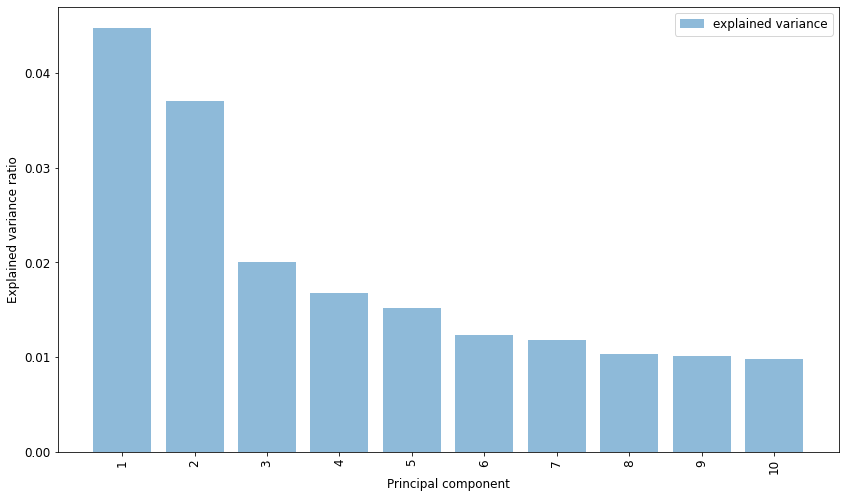

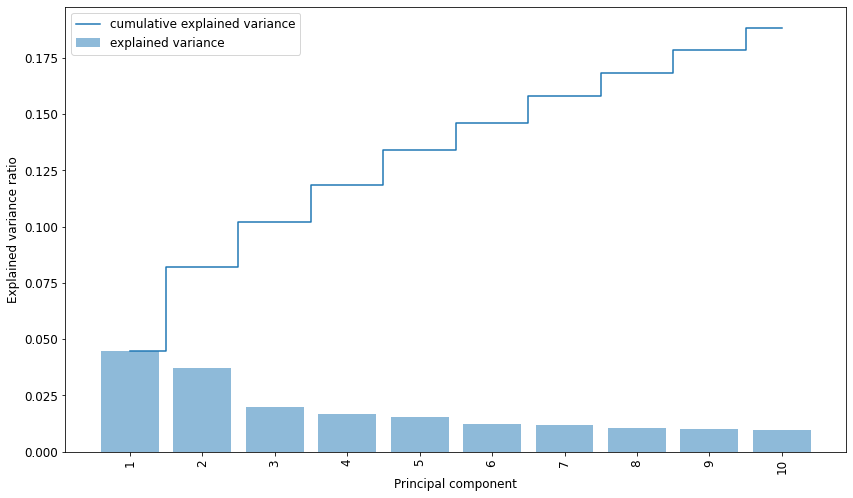

In [9]:
k = 10

top_k, cum_sum = top_k_dimensions(explained_variance, k)
plot_dimensions(top_k, cum_sum)

## 50 Componenti

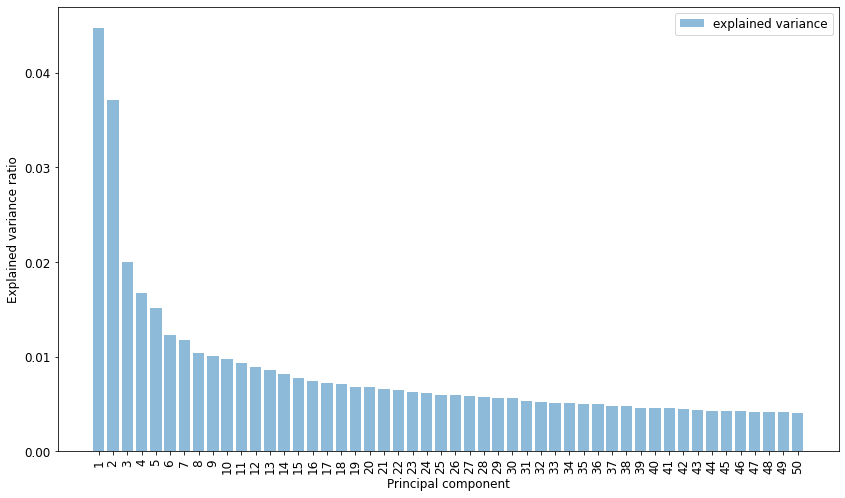

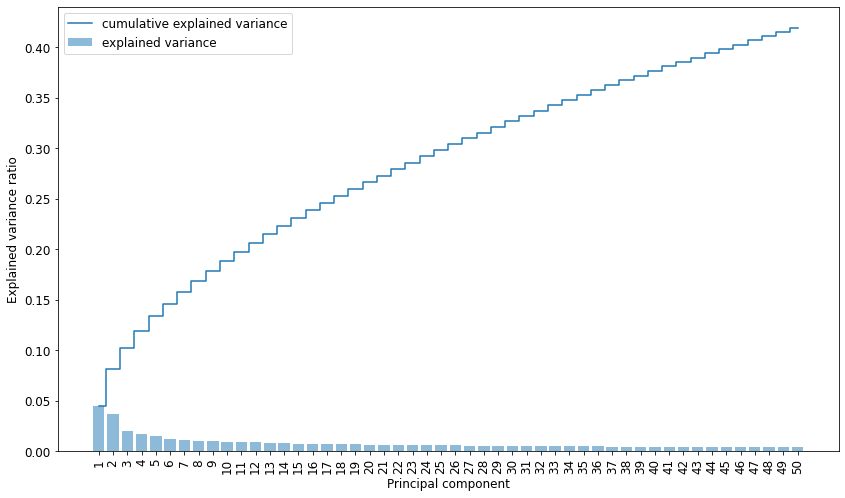

In [10]:
k = 50

top_k, cum_sum = top_k_dimensions(explained_variance, k)
plot_dimensions(top_k, cum_sum)

## Calcolo contributo di ogni variabile
Avendo la matrice composta da n autovettori sulle colonne, calcolo la sommatoria delle colonne
> The importance of each feature is reflected by the magnitude of the corresponding values in the eigenvectors (higher magnitude — higher importance).

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e

`fviz_contrib(res.pca, choice = "var", axes = 1:8, top = 50)`

In [11]:
components = pca.components_

abs_components = np.sum(abs(components), axis=0)

contribution = abs_components / sum(abs_components)
contribution = list(zip(contribution, df.index))
contribution[:5]

[(0.0004740410507902162, 'wow'),
 (0.0004713099392977102, 'ill'),
 (0.00047009893641200605, 'say'),
 (0.00045478968842590253, 'more'),
 (0.00045008901393477763, 'than')]

### Ordino in base al contributo

In [12]:
contribution_sorted = sorted(contribution, key=lambda x: x[0], reverse=True)
contribution_sorted[:5]

[(0.0004807966121269083, 'des'),
 (0.0004802403158998914, 'v'),
 (0.000480035645776422, 'official'),
 (0.00048001894046690094, 'song'),
 (0.00047985682658646065, 'asked')]

## Plot k feature che più contribuiscono relativamente alle componenti principali

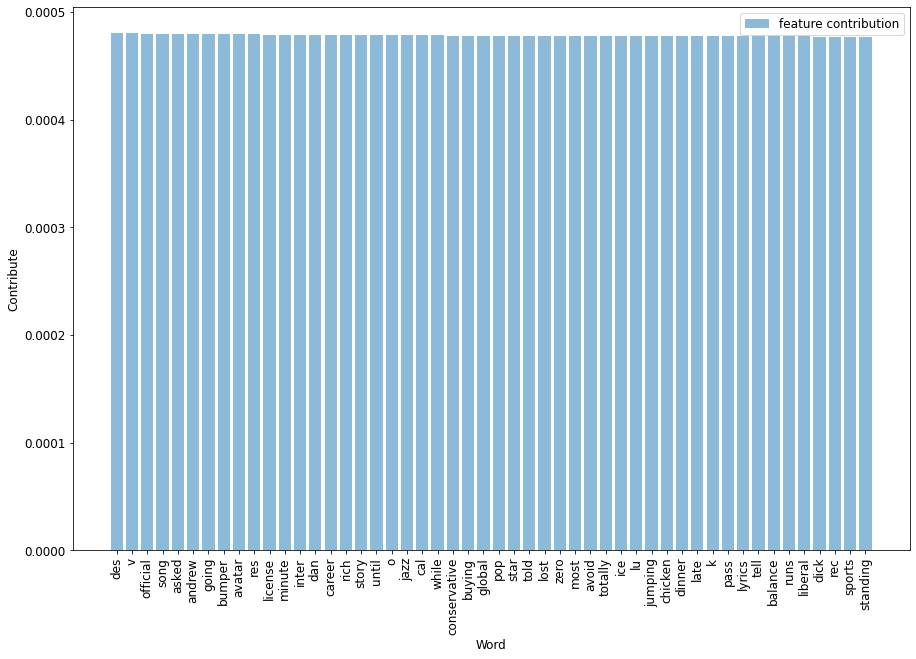

In [13]:
K = 50

top_contribution_sorted = contribution_sorted[:K]

Y_DIM = 10
X_DIM = 15

values = np.array([x for x, _ in top_contribution_sorted])
words = [x for _, x in top_contribution_sorted]

plt.figure(figsize=(X_DIM, Y_DIM))
plt.subplot(1, 1, 1)
plt.bar(range(1, K + 1), values, alpha=0.5, label='feature contribution', align='center')
plt.ylabel('Contribute')
plt.xlabel('Word')
plt.xticks(range(1, K+1), words, rotation='vertical')
plt.legend(loc='best')
plt.savefig(assets_path + '{}/contribution.png'.format(DATASET_TYPE), bbox_inches='tight')
plt.show()